<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Kelompok_Breakroom_9_Computer_vison_with_CNN_Cat_%26_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Kelompok Brakroom 09 Cat & Dog Classification</h>
<h2> Anggota</h2>
<p> 1.Alan FIrdaus Kelas: Al Fatih</p>
<p> 2.Diah Islamiati Kelas: Al Fatih </p>
<p> 3.Tri juni ander kelas: Jatayu</p>
<p> 4.Fitriani </P>

<h1> Parameters ROC </h1>
<p> Acuraccy : 0.5000 </p>
<p> ROC      : 0.44  </p>
<p> LOSS     : 0.6960 </p>

<H1><b>Import Packages untuk mengelola file<b><H1>
<p> pada bagian ini kita akan mengelola file 
yang akan dimodelkan dengan algoritma CNN 
yang didapatkan dari internet
<p>Datasheet yang akan digunakan adalah data traning</p>
<p>dan Datasheet Testing untuk menguji data</p>

# File Datasheet yang akan digunakan Datasheet Cat & Dog Classification
https://drive.google.com/file/d/1HXKswqYI6mJ-DiAaQd_bGsSbjqZeaKsl/view?usp=sharing

In [ ]:
import os
import zipfile

local_zip = '/Training.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')

local_zip = '/Validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

<h1>Membuat partisi File Traning dan Testing</h1> 
<p> yang akan digunakan untuk model yang akan dikembangkan </p>

In [ ]:
#Buat Data Traning untuk model
train_Cat_dir = os.path.join('/tmp/Training/Cat')
train_Dog_dir = os.path.join('/tmp/Training/Dog')

#Buat Data Testing untuk model
Valid_Cat_dir = os.path.join('/tmp/Validation/Cat')
Valid_Dog_dir = os.path.join('/tmp/Validation/Dog')

<h1>Membagi Datasheet</h1>
<p> untuk mengelola data yang akan digunakan untuk model</p>

In [ ]:
train_Cat_names = os.listdir(train_Cat_dir)
print(train_Cat_names[:10])
train_Dog_names = os.listdir(train_Dog_dir)
print(train_Dog_names[:10])

valid_dog_names = os.listdir(Valid_Dog_dir)
print(valid_dog_names[:10])
valid_cat_names = os.listdir(Valid_Cat_dir)
print(valid_cat_names[:10])

['205.png', '98.png', '42.png', '74.png', '180.png', '188.png', '32.png', '111.png', '5.png', '27.png']
['d91.png', 'd77.png', 'd41.png', 'd136.png', 'd15.png', 'd130.png', 'd22.png', 'd94.png', 'd214.png', 'd222.png']
['g94.png', 'd334.png', 'g70.png', 'd253.png', 'g89.png', 'd306.png', 'g85.png', 'g72.png', 'g55.png', 'd322.png']
['t58.png', '312.png', '287.png', 't51.png', 't71.png', '396.png', 't40.png', '255.png', '329.png', '324.png']


<H1> Melihat jumlah Datasheet Training dan Testing </H1>
<p> digunakan untuk melihat jumlah data pada Fungsi Traning dan Testing 

In [ ]:
print('total Cat Training images : ', len(os.listdir(train_Cat_dir)))
print('total Dog Training images : ', len(os.listdir(train_Dog_dir)))
print('total Cat Validation images : ', len(os.listdir(Valid_Cat_dir)))
print('total Dog Validation images : ', len(os.listdir(Valid_Dog_dir)))

total Cat Training images :  247
total Dog Training images :  247
total Cat Validation images :  253
total Dog Validation images :  253


<h1> Buat model dengan Algoritma CNN </h1>
<p> pada bagian ini membuat model data training dan testing dengan algoritma CNN

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

<h1> Tampilkan Gambar untuk model </h1>

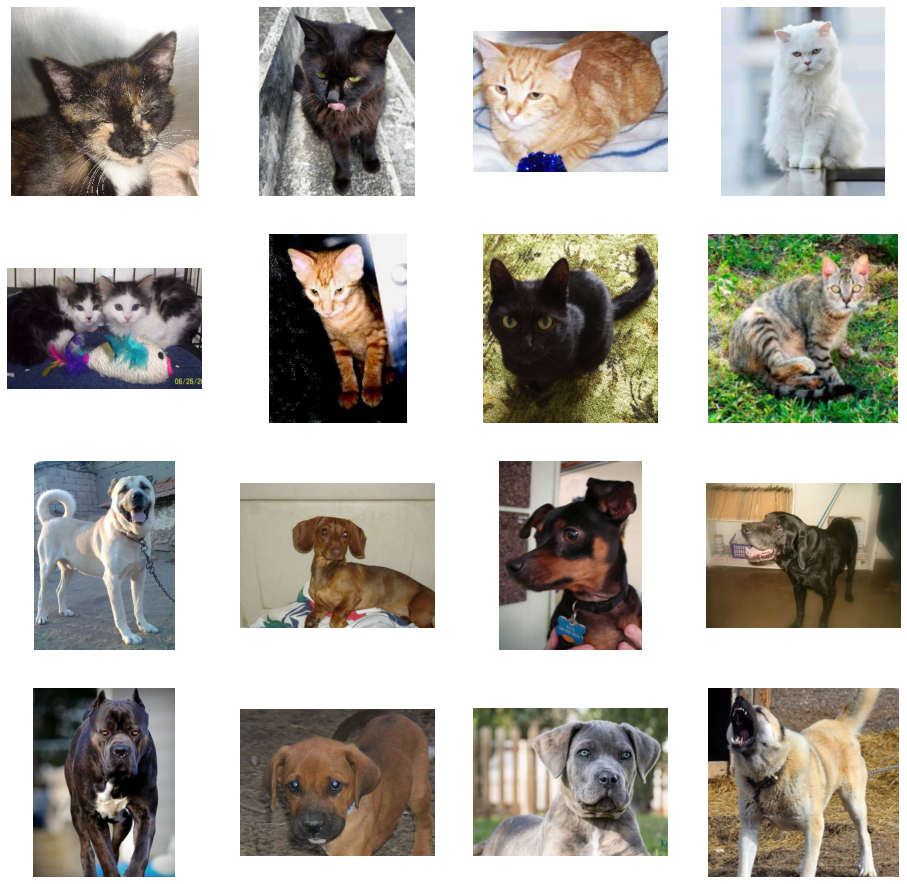

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_dog_pic = [os.path.join(train_Cat_dir, fname)
                      for fname in train_Cat_names[pic_index-8:pic_index]]
next_cat_pic = [os.path.join(train_Dog_dir,fname)
                  for fname in train_Dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dog_pic + next_cat_pic):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path, 0)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/Training/',
    classes = ['Cat','Dog'],
    target_size=(200,200),
    batch_size = 120,
    class_mode='binary'
)
valid_generator = validation_datagen.flow_from_directory(
    '/tmp/Validation/',
    classes = ['Cat','Dog'],
    target_size=(200,200),
    batch_size=19,
    class_mode='binary',
    shuffle=False
)

Found 494 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


<h1> Build Model<h1>

In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5, 5), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    #tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                    #                        activation='relu',padding='same',
                                    #                        input_shape = (200,200,3),
                                    #                        kernel_initializer='he_normal',
                                    #                        bias_initializer='zeros'),
                                    #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid),])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

<h1> pada bagian ini memnguji model dengan Training<h1>

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1,
                    validation_data=valid_generator,
                    validation_steps=8)

Epoch 1/15
8/8 [==============================] - 11s 1s/step - loss: 0.7578 - accuracy: 0.5162 - val_loss: 0.5940 - val_accuracy: 1.0000


<h1> Uji Data Validasi </h1>

In [ ]:
model.evaluate(valid_generator)

27/27 [==============================] - 5s 167ms/step - loss: 0.6960 - accuracy: 0.5000


[0.6960235834121704, 0.5]

In [ ]:
STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size
valid_generator.reset()
preds = model.predict(valid_generator,verbose=1)

27/27 [==============================] - 4s 154ms/step


In [ ]:
fpr,tpr,_=roc_curve(valid_generator.classes,preds)

In [ ]:
roc_auc=auc(fpr,tpr)

<h1> Visualisasikan hasil data training </h1>

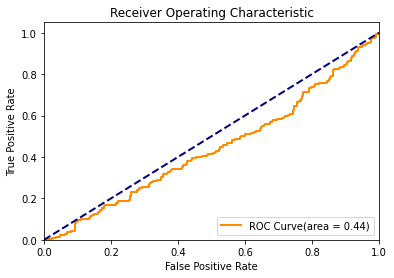

In [ ]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',
         lw=lw,label='ROC Curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()